In [8]:
from imu_calibration import calibrator,dataCollector
from ellipsoid_fit import ellipsoid_plot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import qwiic_icm20948
import ipywidgets as widgets

In [10]:
collector = dataCollector()

pause = widgets.Button(description='Pause')
pause.on_click(collector.togglePauseData)
stop = widgets.Button(description='Stop')
stop.on_click(collector.stop)
display(pause)
display(stop)

Button(description='Pause', style=ButtonStyle())

Button(description='Stop', style=ButtonStyle())

In [11]:
collector.start()

In [4]:
#accel,gyro,mag = collector.getRawData()
#print(accel)

In [12]:
accelCal,magCal = collector.getCalibration()

In [13]:
accel,gyro,mag = collector.getRawData()
normalized = accelCal.correct(accel)
magnorm = magCal.correct(mag)

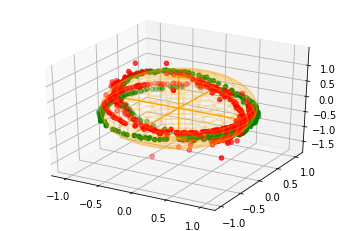

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(normalized[:, 0], normalized[:, 1],normalized[:, 2], marker='o', color='r')
ax.scatter(magnorm[:, 0], magnorm[:, 1],magnorm[:, 2], marker='o', color='g')
ellipsoid_plot([0, 0, 0], [1, 1, 1], np.identity(3), ax=ax, plot_axes=True, cage_color='orange')
plt.show()